In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from alertstack.analyse import Analyse
from alertstack.scramble_catalogues.blazar_catalogue import Fermi4FGLBlazarCatalogue, AverageFluxWeightHypothesis
from alertstack.fixed_catalogues.icecube_neutrino_alerts import CircularisedNeutrinoAlertCatalogue
from alertstack.stats import GammaDistribution

In [10]:
blazars = Fermi4FGLBlazarCatalogue()

blazars.data = blazars.data
# print(blazars.data["Flux1000"][:5])
nu_cat = CircularisedNeutrinoAlertCatalogue()
nu_cat.data = nu_cat.data

print(len(nu_cat.data))

ana = Analyse(
    blazars,
    [AverageFluxWeightHypothesis],
    nu_cat
)

45


In [11]:
# # plt.figure(projection="aitoff")
# %matplotlib inline
# import matplotlib.pyplot as plt
# cat = ana.base_cat.scramble()
# plt.scatter(cat["ra_rad"], cat["dec_rad"])
# plt.figure()


In [12]:
all_res = ana.iterate_run(n_trials=1000, injection_hypo=AverageFluxWeightHypothesis, fraction=1.0, nsteps=5)

sens_threshold = dict()
disc_3_threshold = dict()
disc_4_threshold = dict()
disc_5_threshold = dict()

zero_key = 0.0

for key, val in all_res[zero_key].items():
    sens_threshold[key] = np.median(val)
    gd = GammaDistribution(val)
    disc_3_threshold[key] = gd.calculate_discovery_potential(3.)
    disc_4_threshold[key] = gd.calculate_discovery_potential(4.)
    disc_5_threshold[key] = gd.calculate_discovery_potential(5.)
    # print(Chi2(val))
    # input("?")

100%|██████████| 1000/1000 [01:11<00:00, 13.94it/s]


      fun: 23963.710373434023
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.00509317, 0.00254659, 0.0163709 ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 140
      nit: 29
   status: 0
  success: True
        x: array([ 5.04708712, -3.78983683,  1.26796836])


      fun: 23963.710373434023
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.00509317, 0.00254659, 0.0163709 ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 140
      nit: 29
   status: 0
  success: True
        x: array([ 5.04708712, -3.78983683,  1.26796836])
3 Sigma Discovery Potential: 14.559043876396656
0.9986499669650664
4 Sigma Discovery Potential: 20.699225043413122
0.9999683255907259
5 Sigma Discovery Potential: 27.92596185172568
0.99999971331976


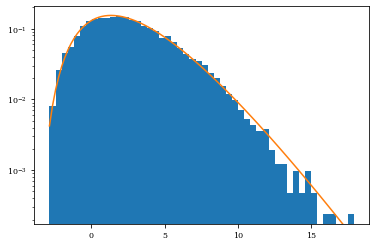

In [13]:
for key, val in all_res[zero_key].items():
    
    gd = GammaDistribution(val)
    
    data = np.array(val)
    
#     bins = np.histogram(data, bins=20)
#     print(np.log(bins[0]), len(bins[0]), len(bins[1]))
    
#     x_vals = [np.mean([x + bins[1][i+1]]) for i, x in enumerate(bins[1][:-1])]
    
#     plt.plot(x_vals, np.log(bins[0]))
    
#     print(x_vals, np.log(bins[0]))
    
    weights = np.ones(len(val))
    weights /= np.sum(weights)
    mask = data > 0.
    
    plt.hist(data, density=True, bins=50)
#     plt.hist(data[mask], weights=weights[mask])
#     plt.hist(data[~mask], weights=weights[~mask], color="grey")
    x_range = np.linspace(min(data), max(data), 100)
#     plt.plot(x_range, scipy.stats.gamma.pdf(x_range, res["x"][0], loc=0., scale=res["x"][1]))
    plt.yscale("log")
    ylim = plt.gca().get_ylim()
    plt.plot(x_range, gd.dist.pdf(x_range))#*(1 - gd.frac_under_zero))
    plt.gca().set_ylim(ylim)
    
    for i in [3, 4, 5]:
        disc_threshold = gd.calculate_discovery_potential(i)
        print("{0} Sigma Discovery Potential: {1}".format(i, disc_threshold))
        print(gd.dist.cdf(disc_threshold))# + gd.frac_under_zero)

In [14]:
levels = [
    ("Background Median", sens_threshold),
    ("3 Sigma Discovery Potential", disc_3_threshold),
    ("4 Sigma Discovery Potential", disc_4_threshold),
    ("5 Sigma Discovery Potential", disc_5_threshold)
]


for step, res in all_res.items():
    print("Fraction of neutrino alerts correlated to source: {0} \n".format(step))

    bkgs = dict()

    for key, val in res.items():
        print(key, np.mean(val), np.median(val), np.std(val))
        val = np.array(val)

        for name, thresh in levels:
            print(thresh[key])
            print("Fraction above {0}: {1}".format(
                name, np.sum(val > thresh[key])/float(len(val))))

Fraction of neutrino alerts correlated to source: 0.0 

average_flux_weight 2.609707816156937 2.23645198255053 2.8205354988378426
2.23645198255053
Fraction above Background Median: 0.5
14.559043876396656
Fraction above 3 Sigma Discovery Potential: 0.0009
20.699225043413122
Fraction above 4 Sigma Discovery Potential: 0.0
27.92596185172568
Fraction above 5 Sigma Discovery Potential: 0.0
Fraction of neutrino alerts correlated to source: 0.2 

average_flux_weight 27.089808948230864 26.88786209009247 9.426732974181233
2.23645198255053
Fraction above Background Median: 1.0
14.559043876396656
Fraction above 3 Sigma Discovery Potential: 0.9
20.699225043413122
Fraction above 4 Sigma Discovery Potential: 0.749
27.92596185172568
Fraction above 5 Sigma Discovery Potential: 0.449
Fraction of neutrino alerts correlated to source: 0.4 

average_flux_weight 48.059061467674645 48.0979674989941 11.091870724908311
2.23645198255053
Fraction above Background Median: 1.0
14.559043876396656
Fraction above 3 

In [15]:
# for key, val in all_res[zero_key].items():
#     weights = np.ones_like(val)/float(len(val))
#     plt.hist(val, weights=weights, bins=50)
#     plt.title(key)
#     plt.yscale("log")
#     plt.figure()
#     plt.hist(val, weights=weights, cumulative=True, bins=50)

(array([ 88., 102.,  98.,  98., 111.,  92., 106.,  89., 103., 113.]),
 array([-9.99223856e-01, -7.99530141e-01, -5.99836426e-01, -4.00142712e-01,
        -2.00448997e-01, -7.55281869e-04,  1.98938433e-01,  3.98632148e-01,
         5.98325863e-01,  7.98019578e-01,  9.97713292e-01]),
 <a list of 10 Patch objects>)

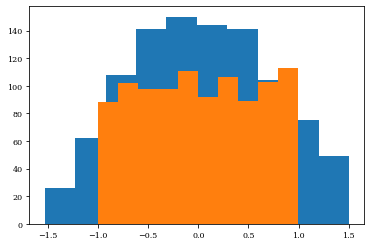

In [16]:
import numpy as np
res = np.arccos(np.random.uniform(size=1000)*2 - 1) - np.pi/2.
plt.hist(res)
plt.hist(np.cos(np.pi/2. - res))

0.23914848943700232


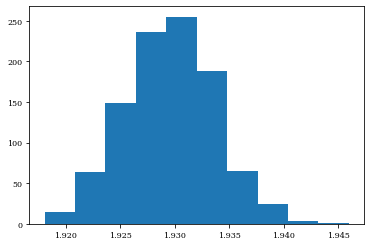

In [17]:
nu = nu_cat.data[0]

ras = [nu.simulate_position()[0] for _ in range(1000)]
plt.hist(ras)
print(np.degrees(nu.sigma))